In [230]:
import pandas as pd

# Carica i dataset
ratings = pd.read_csv(r"C:\Users\gallo\OneDrive - Universita degli Studi Roma Tre\Documenti\adm-hw4\rating.csv")  # Contiene userId, movieId, rating, timestamp
tags = pd.read_csv(r"C:\Users\gallo\OneDrive - Universita degli Studi Roma Tre\Documenti\adm-hw4\tag.csv")        # Contiene userId, movieId, tag, timestamp
movies = pd.read_csv(r"C:\Users\gallo\OneDrive - Universita degli Studi Roma Tre\Documenti\adm-hw4\movie.csv")    # Contiene movieId, title, genres
relevance = pd.read_csv(r"C:\Users\gallo\OneDrive - Universita degli Studi Roma Tre\Documenti\adm-hw4\genome_scores.csv")  # Contiene movieId, tagId, relevance
tag_names = pd.read_csv(r"C:\Users\gallo\OneDrive - Universita degli Studi Roma Tre\Documenti\adm-hw4\genome_tags.csv") # Contiene tagId, tag


In [231]:
ratings_avg = ratings.groupby('movieId')['rating'].mean().reset_index()
ratings_avg.columns = ['movieId', 'ratings_avg']


In [232]:
num_ratings = ratings.groupby('movieId').size().reset_index(name='num_ratings')
num_ratings

,movieId,num_ratings
0,1,49695
1,2,22243
2,3,12735
3,4,2756
4,5,12161
...,...,...
26739,131254,1
26740,131256,1
26741,131258,1
26742,131260,1


In [233]:
# Unisci relevance con i nomi dei tag
relevant_tags = relevance.merge(tag_names, on='tagId')

# Trova il tag con la massima rilevanza per ogni film
relevant_genome_tag = relevant_tags.loc[relevant_tags.groupby('movieId')['relevance'].idxmax()]
relevant_genome_tag = relevant_genome_tag[['movieId', 'tag']]
relevant_genome_tag.columns = ['movieId', 'relevant_genome_tag']
relevant_genome_tag


,movieId,relevant_genome_tag
1035,1,toys
1156,2,adventure
2706,3,good sequel
4499,4,women
4962,5,good sequel
...,...,...
11704209,130578,assassination
11706118,130840,romance
11706613,131013,comedy
11707639,131168,betrayal


In [234]:
common_user_tag = tags.groupby(['movieId', 'tag']).size().reset_index(name='count')
common_user_tag = common_user_tag.loc[common_user_tag.groupby('movieId')['count'].idxmax()]
common_user_tag = common_user_tag[['movieId', 'tag']]
common_user_tag.columns = ['movieId', 'common_user_tag']
common_user_tag


,movieId,common_user_tag
19,1,Pixar
94,2,Robin Williams
129,3,moldy
135,4,characters
151,5,steve martin
...,...,...
200355,131054,dinosaurs
200356,131082,Yoshitomo Nara
200358,131164,Vietnam War
200359,131170,alternate reality


In [235]:
genre_features = movies['genres'].str.get_dummies(sep='|')
genre_features['movieId'] = movies['movieId']
genre_features


,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,movieId
0,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
3,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,4
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,131254
27274,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,131256
27275,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,131258
27276,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,131260


In [236]:
# Extract the release year from the movie title
movies['release_year'] = movies['title'].str.extract(r'\((\d{4})\)')

# Ensure the column is in integer format
movies['release_year'] = movies['release_year'].astype('Int64')

# Display the updated DataFrame
print(movies[['movieId', 'title', 'release_year']].head())



   movieId                               title  release_year
0        1                    Toy Story (1995)          1995
1        2                      Jumanji (1995)          1995
2        3             Grumpier Old Men (1995)          1995
3        4            Waiting to Exhale (1995)          1995
4        5  Father of the Bride Part II (1995)          1995


In [237]:
# Unisci le feature
movies_features = movies[['movieId', 'release_year']].merge(ratings_avg, on='movieId', how='left')
movies_features = movies_features.merge(num_ratings, on='movieId', how='left')
movies_features = movies_features.merge(relevant_genome_tag, on='movieId', how='left')
movies_features = movies_features.merge(common_user_tag, on='movieId', how='left')
movies_features = movies_features.merge(genre_features, on='movieId', how='left')

# Visualizza le prime righe del DataFrame risultante
movies_features.head()



,movieId,release_year,ratings_avg,num_ratings,relevant_genome_tag,common_user_tag,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1995,3.921240,49695.0,toys,Pixar,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,1995,3.211977,22243.0,adventure,Robin Williams,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1995,3.151040,12735.0,good sequel,moldy,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,1995,2.861393,2756.0,women,characters,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,1995,3.064592,12161.0,good sequel,steve martin,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [238]:
num_users = ratings['userId'].nunique()
popularity_ratio = num_ratings.copy()
popularity_ratio['popularity_ratio'] = popularity_ratio['num_ratings'] / num_users
movies_features = movies_features.merge(popularity_ratio[['movieId', 'popularity_ratio']], on='movieId', how='left', suffixes=('', '_duplicate'))
movies_features.head()


,movieId,release_year,ratings_avg,num_ratings,relevant_genome_tag,common_user_tag,(no genres listed),Action,Adventure,Animation,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,popularity_ratio
0,1,1995,3.921240,49695.0,toys,Pixar,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0.358827
1,2,1995,3.211977,22243.0,adventure,Robin Williams,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.160607
2,3,1995,3.151040,12735.0,good sequel,moldy,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.091954
3,4,1995,2.861393,2756.0,women,characters,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.019900
4,5,1995,3.064592,12161.0,good sequel,steve martin,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.087809


In [239]:
movies['genre_count'] = movies['genres'].apply(lambda x: len(x.split('|')))
movies_features = movies_features.merge(movies[['movieId', 'genre_count']], on='movieId', how='left')
movies_features


,movieId,release_year,ratings_avg,num_ratings,relevant_genome_tag,common_user_tag,(no genres listed),Action,Adventure,Animation,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,popularity_ratio,genre_count
0,1,1995,3.921240,49695.0,toys,Pixar,0,0,1,1,...,0,0,0,0,0,0,0,0,0.358827,5
1,2,1995,3.211977,22243.0,adventure,Robin Williams,0,0,1,0,...,0,0,0,0,0,0,0,0,0.160607,3
2,3,1995,3.151040,12735.0,good sequel,moldy,0,0,0,0,...,0,0,0,1,0,0,0,0,0.091954,2
3,4,1995,2.861393,2756.0,women,characters,0,0,0,0,...,0,0,0,1,0,0,0,0,0.019900,3
4,5,1995,3.064592,12161.0,good sequel,steve martin,0,0,0,0,...,0,0,0,0,0,0,0,0,0.087809,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,2007,4.000000,1.0,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000007,1
27274,131256,2002,4.000000,1.0,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000007,1
27275,131258,2014,2.500000,1.0,NaN,Korea,0,0,1,0,...,0,0,0,0,0,0,0,0,0.000007,1
27276,131260,2001,3.000000,1.0,NaN,NaN,1,0,0,0,...,0,0,0,0,0,0,0,0,0.000007,1


In [240]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Create a SimpleImputer object to replace NaN values with the column mean
imputer = SimpleImputer(strategy='mean')

# Apply the imputer only to numeric columns
numeric_columns = movies_features.select_dtypes(include=['number']).columns
movies_features[numeric_columns] = imputer.fit_transform(movies_features[numeric_columns])

# Fill missing categorical values with a placeholder
movies_features['relevant_genome_tag'].fillna('Unknown', inplace=True)
movies_features['common_user_tag'].fillna('Unknown', inplace=True)

# Verify that there are no remaining NaN values
print(movies_features.isnull().sum())



movieId                0
release_year           0
ratings_avg            0
num_ratings            0
relevant_genome_tag    0
common_user_tag        0
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
popularity_ratio       0
genre_count            0
dtype: int64


C:\Users\gallo\AppData\Local\Temp\ipykernel_26836\3122457175.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies_features['relevant_genome_tag'].fillna('Unknown', inplace=True)
C:\Users\gallo\AppData\Local\Temp\ipykernel_26836\3122457175.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [241]:
print(movies_features)


        movieId  release_year  ratings_avg  num_ratings relevant_genome_tag  \
0           1.0        1995.0     3.921240      49695.0                toys   
1           2.0        1995.0     3.211977      22243.0           adventure   
2           3.0        1995.0     3.151040      12735.0         good sequel   
3           4.0        1995.0     2.861393       2756.0               women   
4           5.0        1995.0     3.064592      12161.0         good sequel   
...         ...           ...          ...          ...                 ...   
27273  131254.0        2007.0     4.000000          1.0             Unknown   
27274  131256.0        2002.0     4.000000          1.0             Unknown   
27275  131258.0        2014.0     2.500000          1.0             Unknown   
27276  131260.0        2001.0     3.000000          1.0             Unknown   
27277  131262.0        2014.0     4.000000          1.0             Unknown   

      common_user_tag  (no genres listed)  Action  

2.2.1

What is the importance of normalizing the data in your analysis, and how does it impact the effectiveness of the clustering algorithms you plan to use?

Normalization is important in clustering because features on different scales can affect how distances are calculated. In our analysis, we standardized the two numerical features we had, `ratings_avg` (ranging from 0 to 5) and `num_ratings` (with much larger values), since they were on different scales. Without normalization, `num_ratings` would have dominated the clustering results. By scaling both features to the same range, we ensured they contribute equally, leading to more balanced and accurate clusters.

2.2.2

If you find that normalizing the values is beneficial, please proceed to normalize the data. To simplify this task, refer to the scikit-learn package for tools and functions that facilitate data normalization.

describe the decision of normalize some columns by using the variance..... TO DO

In [242]:
import pandas as pd

# Filtrare solo le colonne numeriche
numerical_features = movies_features.select_dtypes(include=['number'])

# Calcolo della varianza per ogni colonna numerica
variances = numerical_features.var()

# Creiamo un DataFrame per analizzare meglio le varianze
variance_df = pd.DataFrame({
    'Feature': variances.index,
    'Variance': variances.values
}).sort_values(by='Variance', ascending=False)

# Visualizziamo le varianze
print("Varianze di tutte le colonne numeriche:")
print(variance_df)

# Identifichiamo le colonne con varianza troppo bassa (<0.01 ad esempio)
low_variance_features = variance_df[variance_df['Variance'] < 0.01]
print("\nColonne numeriche con varianza molto bassa (potrebbero essere ignorate o trattate):")
print(low_variance_features)

# Visualizziamo la lista delle colonne binarie per confronto
binary_features = [col for col in numerical_features.columns if numerical_features[col].dropna().nunique() == 2]
binary_variances = variances[binary_features]
print("\nVarianze delle colonne numeriche binarie:")
print(binary_variances)

Varianze di tutte le colonne numeriche:
               Feature      Variance
0              movieId  1.973964e+09
3          num_ratings  9.335857e+06
1         release_year  5.441125e+02
25         genre_count  1.078534e+00
2          ratings_avg  4.323743e-01
12               Drama  2.498922e-01
9               Comedy  2.127539e-01
21            Thriller  1.297094e-01
19             Romance  1.284089e-01
5               Action  1.123941e-01
10               Crime  9.613758e-02
15              Horror  8.655937e-02
11         Documentary  8.238305e-02
6            Adventure  7.809325e-02
20              Sci-Fi  5.981693e-02
18             Mystery  5.242399e-02
13             Fantasy  4.908568e-02
22                 War  4.185712e-02
8             Children  4.001323e-02
17             Musical  3.653823e-02
7            Animation  3.623324e-02
23             Western  2.416862e-02
14           Film-Noir  1.195175e-02
4   (no genres listed)  8.937255e-03
16                IMAX  7.133911e-0

In [243]:
#from sklearn.preprocessing import StandardScaler

# Select the features to normalize
#features_to_normalize = movies_features[['release_year', 'ratings_avg', 'num_ratings', 'popularity_ratio', 'genre_count']]

# Initialize the scaler
#scaler = StandardScaler()

# Apply the scaler to the selected features
#features_scaled = scaler.fit_transform(features_to_normalize)

# Replace the original columns in movies_features with the scaled values
#movies_features[['release_year', 'ratings_avg', 'num_ratings', 'popularity_ratio', 'genre_count']] = features_scaled

# Display the updated DataFrame
#movies_features






2.2.3

Could you provide some insights on dimensionality reduction? What techniques would be effective for reducing the number of features in the dataset, and why might this be beneficial for the analysis?

The dimensionality reduction algorithm we will use is PCA (Principal Component Analysis). Dimensionality reduction is applied when a dataset contains many features, and consequently, a lot of information. The goal of PCA is to identify the directions of maximum variance in the data and reduce the number of features by projecting them onto fewer components.

The number of components chosen determines the percentage of the total variance retained from the original features. Therefore, selecting the appropriate number of components is crucial. In this case, the original features are transformed into fewer components, which improves the computational efficiency of the algorithm, reduces noise by eliminating less informative features, and retains only the most relevant ones. Additionally, it helps reduce the risk of overfitting, as datasets with high dimensionality often lead to models that over-adapt to the training data.

By reducing the dimensionality, PCA allows us to focus on the most important patterns in the data while ensuring that the analysis remains robust and efficient.

2.2.4

If you believe dimensionality reduction would be advantageous, please select a method to reduce the dimensionality of the data.

describe the pca and also talk about the strategy used for fill the Nan values... TO DO

In [249]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import pandas as pd

# Remove unnecessary columns
columns_to_remove = ['movieId', 'relevant_genome_tag', 'common_user_tag']
features_for_pca = movies_features.drop(columns=columns_to_remove)

# Handle NaN values: impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
features_for_pca = pd.DataFrame(imputer.fit_transform(features_for_pca), columns=features_for_pca.columns)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
reduced_features = pca.fit_transform(features_for_pca)

# Create a new DataFrame with the reduced features
reduced_features_df = pd.DataFrame(reduced_features, columns=[f'PC{i+1}' for i in range(reduced_features.shape[1])])

# Add the movie ID column for reference
reduced_features_df['movieId'] = movies_features['movieId']

# Print the shapes of the original and reduced feature sets
print(f"Shape of the original features: {features_for_pca.shape}")
print(f"Shape of the reduced features: {reduced_features_df.shape}")

# Display the first few rows of the reduced feature set
print(reduced_features_df.head())




Shape of the original features: (27278, 25)
Shape of the reduced features: (27278, 2)
            PC1  movieId
0  48947.159269      1.0
1  21495.159504      2.0
2  11987.159568      3.0
3   2008.159741      4.0
4  11413.159518      5.0


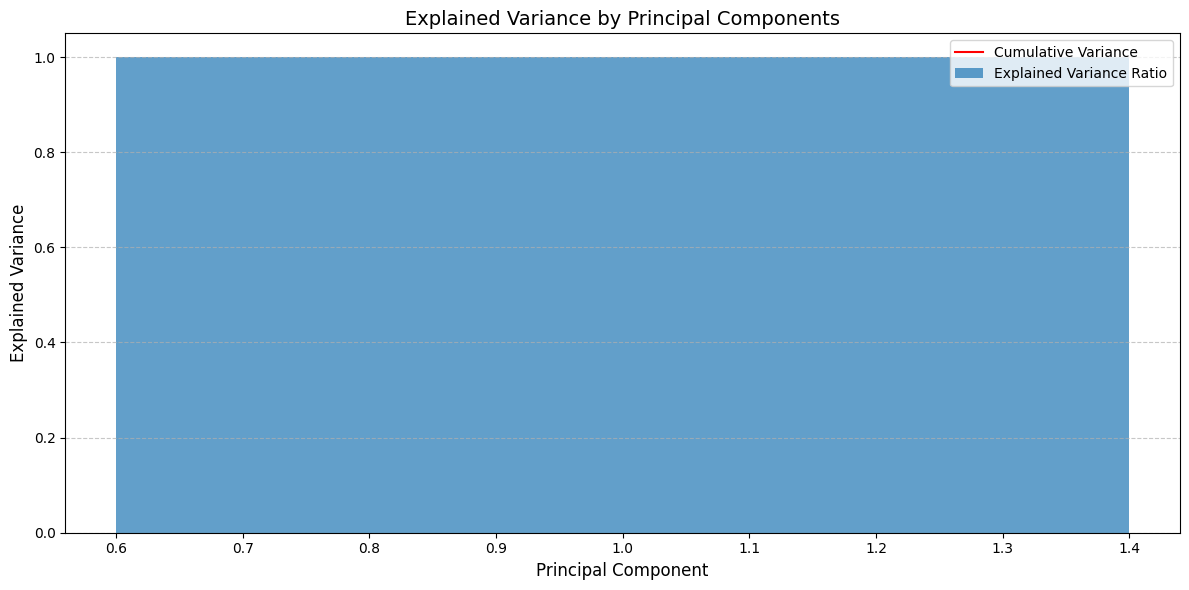

In [245]:
import matplotlib.pyplot as plt
import numpy as np

# Extract explained variance ratio and cumulative variance from PCA
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Create a bar chart for explained variance ratio and a line plot for cumulative variance
plt.figure(figsize=(12, 6))

# Bar chart for explained variance ratio
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Explained Variance Ratio')

# Line plot for cumulative variance
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='red', label='Cumulative Variance')

# Labels and title
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance', fontsize=12)
plt.title('Explained Variance by Principal Components', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


talk about choosing the number of variables based on the variance explained... TO DO

2.3

How can you determine the optimal number of clusters for your data? Please use at least two methods and provide their results.

To analyze and determine the optimal number of clusters, we will use two methods: the Elbow Method and the Silhouette Score Method.

The Elbow Method is based on the observation of the sum of squared distances (inertia) within clusters. As the number of clusters increases, the inertia decreases. The optimal number of clusters is identified at the "elbow point," where the decrease in inertia becomes less significant, indicating a balance between compactness and simplicity

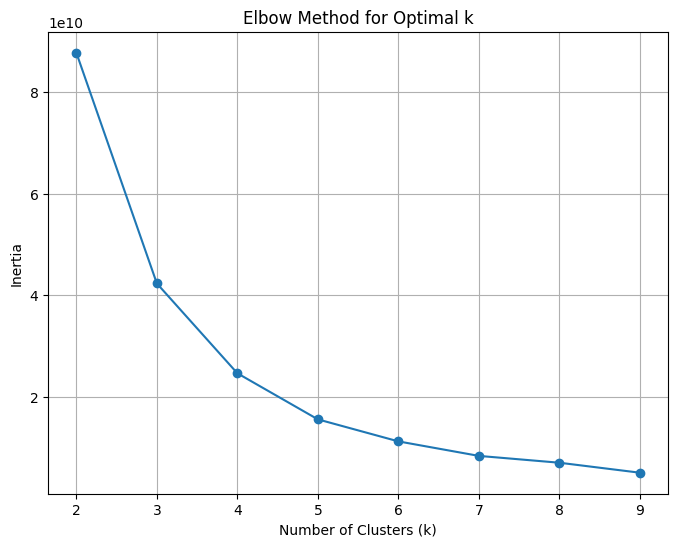

In [246]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range di valori per k
k_values = range(2, 10)  # Proviamo da 2 a 9 cluster
inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(reduced_features)
    inertia.append(kmeans.inertia_)

# Grafico del Metodo del Gomito
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


The Silhouette Score evaluates how well a data point is assigned to its cluster compared to other clusters. It ranges from -1 to 1, where higher values indicate better-defined clusters. The optimal number of clusters is determined by finding the kk value with the highest average silhouette score, representing the best separation and cohesion of clusters.

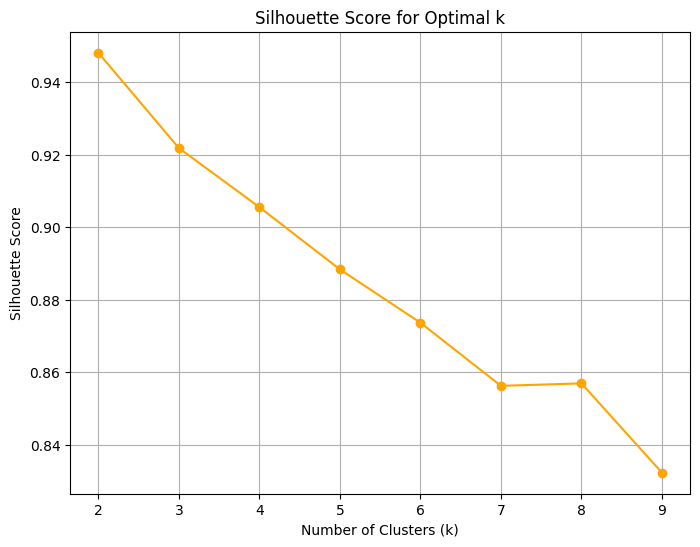

In [247]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_features)
    silhouette_scores.append(silhouette_score(reduced_features, cluster_labels))

# Grafico del Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.show()


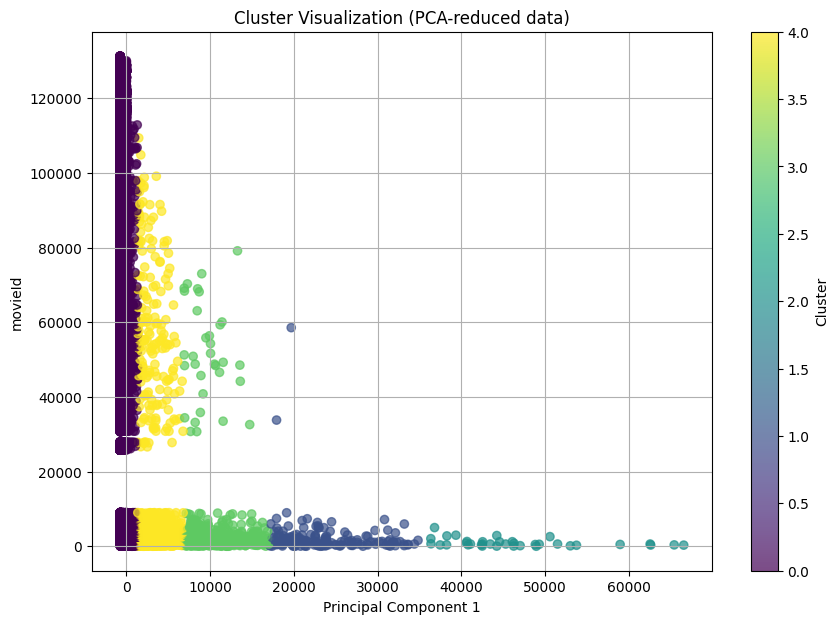

In [250]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definisci il numero ottimale di cluster (ad esempio k=5, basato sul Silhouette Score)
num_clusters = 5

# Esegui K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_features)

# Aggiungi le etichette dei cluster al DataFrame ridotto
reduced_features_df['Cluster'] = cluster_labels

# Visualizza i cluster
plt.figure(figsize=(10, 7))
plt.scatter(reduced_features_df['PC1'], reduced_features_df['movieId'], c=reduced_features_df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('movieId')
plt.title('Cluster Visualization (PCA-reduced data)')
plt.grid(True)
plt.show()
